In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from collections import Counter
from pmareport import pmareport
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clinic = pmareport.Clinic()
df = clinic.df

In [3]:
df.head()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,1900-01-01 07:55:00,-1 days +23:56:00,12,15,1,0,16,0,0
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,1900-01-01 08:15:00,00:00:00,3,35,1,0,16,1,0
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,1900-01-01 08:26:00,-1 days +23:56:00,16,35,1,0,16,2,0
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,1900-01-01 09:03:00,00:03:00,8,28,1,0,16,3,0
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,1900-01-01 09:56:00,-1 days +23:56:00,4,16,1,0,16,4,1


,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PROVIDER_NAME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts,appt_pos_overall,appt_pos_doctor
0,4591553,Uncommon Cold,BlueSword/BlueDiamond,31,M,L. Jedermann,2005-01-03,1900-01-01 07:59:00,1900-01-01 08:07:00,1900-01-01 08:22:00,1900-01-01 07:55:00,-1 days +23:56:00,12,15,1,0,16,0,0
1,4607440,TV Personality Disorder,Medifix,48,F,I. Petrov,2005-01-03,1900-01-01 08:15:00,1900-01-01 08:18:00,1900-01-01 08:53:00,1900-01-01 08:15:00,00:00:00,3,35,1,0,16,1,0
2,4590430,TV Personality Disorder,Medifix,42,M,E. Medelsvensson,2005-01-03,1900-01-01 08:30:00,1900-01-01 08:42:00,1900-01-01 09:17:00,1900-01-01 08:26:00,-1 days +23:56:00,16,35,1,0,16,2,0
3,4619481,Saturday Night Fever,Self Insured,22,M,J. Smith,2005-01-03,1900-01-01 09:00:00,1900-01-01 09:11:00,1900-01-01 09:39:00,1900-01-01 09:03:00,00:03:00,8,28,1,0,16,3,0
4,4610862,Uncommon Cold,Self Insured,32,M,L. Jedermann,2005-01-03,1900-01-01 10:00:00,1900-01-01 10:00:00,1900-01-01 10:16:00,1900-01-01 09:56:00,-1 days +23:56:00,4,16,1,0,16,4,1


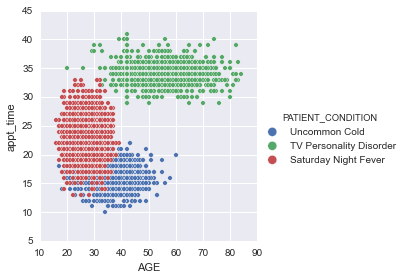

In [5]:
clinic.make_scatter()

In [ ]:
g = sns.FacetGrid(data=df, hue='PATIENT_CONDITION', col='PROVIDER_NAME', row='month', size=5, aspect=1)
g = g.map(plt.scatter, 'AGE', 'appt_time', edgecolor='w')
g.add_legend(fontsize=15, markerscale=3)
# g.savefig('age_appt_time_by_doctor_by_month.png')

In [106]:
df_date_doctor = df.groupby(['date', 'PROVIDER_NAME'])

In [107]:
df_date_doctor_count = df_date_doctor.count()

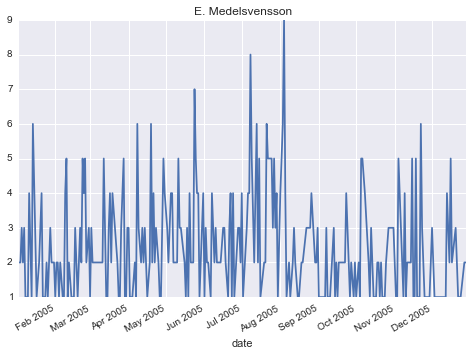

In [109]:
for i in set(df.PROVIDER_NAME):
    plt.clf()
    df_date_doctor_count.xs(i, level='PROVIDER_NAME').PATIENT_ID.plot()
    plt.title(i)
    plt.savefig('doc_appts_{}.png'.format(i), dpi=300)

In [76]:
p = df_date_doctor_count.loc[(slice(None), df.PROVIDER_NAME[0]),:].PATIENT_ID

In [79]:
i = p.index

In [82]:
i.droplevel(1)

Index([u'2005-01-03', u'2005-01-04', u'2005-01-06', u'2005-01-10',
       u'2005-01-11', u'2005-01-17', u'2005-01-18', u'2005-01-19',
       u'2005-01-20', u'2005-01-22', 
       ...
       u'2005-12-20', u'2005-12-21', u'2005-12-22', u'2005-12-23',
       u'2005-12-24', u'2005-12-27', u'2005-12-28', u'2005-12-29',
       u'2005-12-30', u'2005-12-31'],
      dtype='object', name=u'VISIT_DATE', length=242)

In [114]:
for i in set(df.PROVIDER_NAME):
    p2 = df_date_doctor_count.xs(i, level='PROVIDER_NAME').PATIENT_ID
    print '{}\t{:.2f}\t{:.2f}'.format(i[:10], p2.mean(), p2.std())

W. Plinge	3.26	1.71
K. van der	3.14	1.81
C. Siu Min	2.06	1.23
J. Smith	3.24	1.70
L. Jederma	1.99	1.12
I. Petrov	2.47	1.36
N. Fulano	2.50	1.54
M. Dupont	2.10	1.11
E. Medelsv	2.51	1.48


In [102]:
df_date_doctor_count.describe()

,PATIENT_ID,PATIENT_CONDITION,INSURANCE_TYPE,AGE,SEX,PT_SCHEDULED_APPT,PT_ARRIVE_TIME,PT_START_TIME,PT_END_TIME,date,sched,start,end,arrive,lateness,delay,appt_time,month,dayofweek,num_appts
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072,2.627072
std,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438,1.572438
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


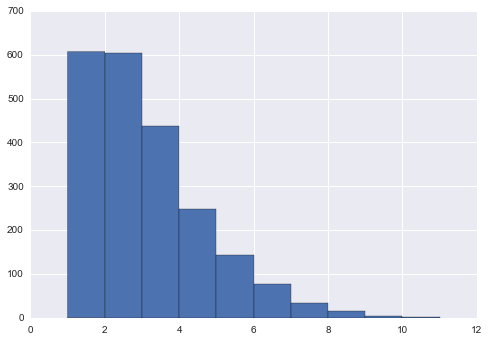

In [104]:
df_date_doctor_count.PATIENT_ID.hist()

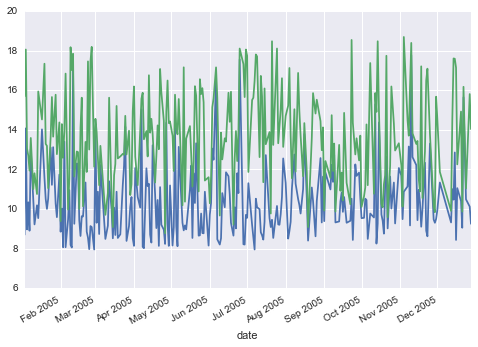

In [136]:
for i in set(df.PROVIDER_NAME):
    plt.clf()
    s = df_date_doctor.start.min().xs(i, level='PROVIDER_NAME').dt
    (s.hour + s.minute/60.0).plot()
    e = df_date_doctor.end.max().xs(i, level='PROVIDER_NAME').dt
    (e.hour + e.minute/60.0).plot()
    plt.savefig('start_end_{}.png'.format(i), dpi=300)

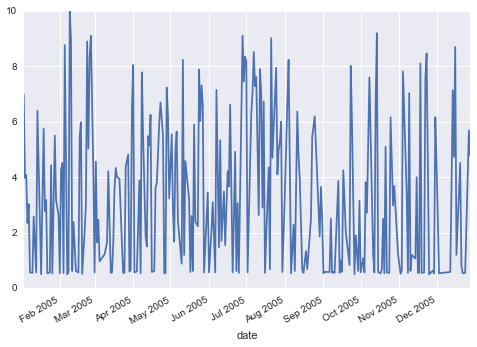

In [137]:
for i in set(df.PROVIDER_NAME):
    plt.clf()
    s = df_date_doctor.start.min().xs(i, level='PROVIDER_NAME').dt
    e = df_date_doctor.end.max().xs(i, level='PROVIDER_NAME').dt
    ((e.hour + e.minute/60.0) - (s.hour + s.minute/60.0)).plot() 
    plt.savefig('length_of_day_{}.png'.format(i), dpi=300)